In [1]:
# Importing all the needed librairies
import pandas as pd
import matplotlib.pyplot as plt
from BDD import BDD
from Indicator import mae, bollinger
from API_Request import asset_data
import datetime as dt
import numpy as np

In [2]:
#Creating the database in order to store stock datas

cla=BDD("Asset.db")
cla.create_table("Apple")

# Getting datas from Alpha Vantage API
liste=asset_data("AAPL")

# Store datas in the database
cla.insert_data(liste,"Apple")

# Getting datas from the database and cleaning a bit
MSFT=cla.get_data_bdd_as_df("Apple")
MSFT['date'] = pd.to_datetime(MSFT['date'])
MSFT.set_index('date', inplace=True)

# Print data to check that everything is alright
MSFT.head()

,open,close,high,low,volume
date,,,,,
2000-01-03,104.87,111.94,112.50,101.69,4783900.0
2000-01-04,108.25,102.50,110.62,101.19,4574800.0
2000-01-05,103.75,104.00,110.56,103.00,6949300.0
2000-01-06,106.12,95.00,107.00,95.00,6856900.0
2000-01-07,96.50,99.50,101.00,95.50,4113700.0


In [17]:
# Adding the different indicators to the DataFrame

# EMA
MSFT['MAE_42']=mae(MSFT,42)
MSFT['MAE_120']=mae(MSFT,120)

# Bollinger's Bands
MSFT = bollinger(MSFT,20)

# Checking the results
MSFT.head()

C:\Users\antoi\Desktop\BDD\Indicator.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=42,min_periods=0,adjust=False,ignore_na=False).mean()
  average=ewma(data['close'],com=interval,adjust=False)
C:\Users\antoi\Desktop\BDD\Indicator.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=120,min_periods=0,adjust=False,ignore_na=False).mean()
  average=ewma(data['close'],com=interval,adjust=False)
C:\Users\antoi\Desktop\BDD\Indicator.py:20: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,min_periods=20,center=False).std()
  sigma=pd.rolling_std(data['close'], interval, min_periods=interval)


,open,close,high,low,volume,MAE_42,MAE_120,MA,MAsup,MAinf,signal,position,holdings,pos_diff,cash,total,returns
date,,,,,,,,,,,,,,,,,
2015-01-02,111.39,109.33,111.44,107.350,53204626.0,109.330000,109.330000,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,101713.4,101713.4,0.0
2015-01-05,108.29,106.25,108.65,105.410,64285491.0,109.258372,109.304545,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,101713.4,101713.4,0.0
2015-01-06,106.54,106.26,107.43,104.630,65797116.0,109.188643,109.279384,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,101713.4,101713.4,0.0
2015-01-07,107.20,107.75,108.20,106.695,40105934.0,109.155186,109.266744,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,101713.4,101713.4,0.0
2015-01-08,109.23,111.89,112.15,108.700,59364547.0,109.218786,109.288424,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,101713.4,101713.4,0.0


In [15]:
cla=BDD("Asset.db")
cla.add_column_bdd("Microsoft","MA",MSFT)

Column already exist


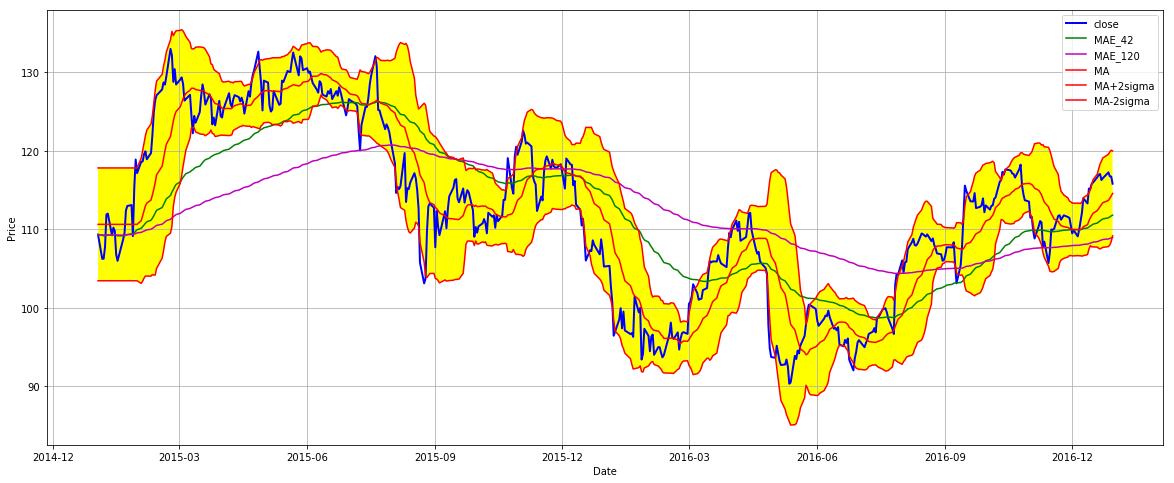

In [37]:
# Plotting all indicators and historical prices

# Subsetting for better understanding of each indicator
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2018, 1, 1)
MSFT = MSFT.loc[start:end]

# Setting up plotting parameters
plt.figure(num=1, figsize=(20,8))

#PLOT CLOSE VALUE
plt.plot(MSFT['close'],'b', label='close',linewidth=2)
#PLOT FOR EXPONENTIAL MOVING AVERAGE
plt.plot(MSFT['MAE_42'],'g',label='MAE_42')
plt.plot(MSFT['MAE_120'],'m',label='MAE_120')

#PLOT FOR BOLLINGER
plt.plot(MSFT['MA'],'r',label='MA')
plt.plot(MSFT['MAsup'],'r',label='MA+2sigma')
plt.plot(MSFT['MAinf'],'r',label='MA-2sigma')
plt.fill_between(MSFT.index,MSFT['MAsup'],MSFT['MAinf'],facecolor="yellow")

plt.ylabel('Price')
plt.xlabel('Date')
 
plt.grid()
plt.legend(loc=0)

# Display everything
plt.show()

In [32]:
#Setting the crossover signal
MSFT['signal']=0.
MSFT['signal']=np.where((MSFT['MAE_42']>MSFT['MAE_120']) ,1.,0.)

#Generating trading orders
MSFT['position'] = MSFT['signal'].diff()

#Clearing datas
MSFT['signal'].fillna(0.0, inplace=True)
MSFT['position'].fillna(0.0, inplace=True)

MSFT


,open,close,high,low,volume,MAE_42,MAE_120,MA,MAsup,MAinf,signal,position,holdings,pos_diff,cash,total,returns
date,,,,,,,,,,,,,,,,,
2015-01-02,111.390,109.33,111.4400,107.350,53204626.0,109.330000,109.330000,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,NaN
2015-01-05,108.290,106.25,108.6500,105.410,64285491.0,109.258372,109.304545,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-06,106.540,106.26,107.4300,104.630,65797116.0,109.188643,109.279384,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-07,107.200,107.75,108.2000,106.695,40105934.0,109.155186,109.266744,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-08,109.230,111.89,112.1500,108.700,59364547.0,109.218786,109.288424,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-09,112.670,112.01,113.2500,110.210,53315099.0,109.283698,109.310917,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-12,112.600,109.25,112.6300,108.800,49650790.0,109.282914,109.310413,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-13,111.430,110.22,112.8000,108.910,67091928.0,109.304707,109.317930,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000
2015-01-14,109.040,109.80,110.4900,108.500,48956588.0,109.316225,109.321914,110.6415,117.827587,103.455413,0.0,0.0,0.0,0.0,100000.0,100000.0,0.000000


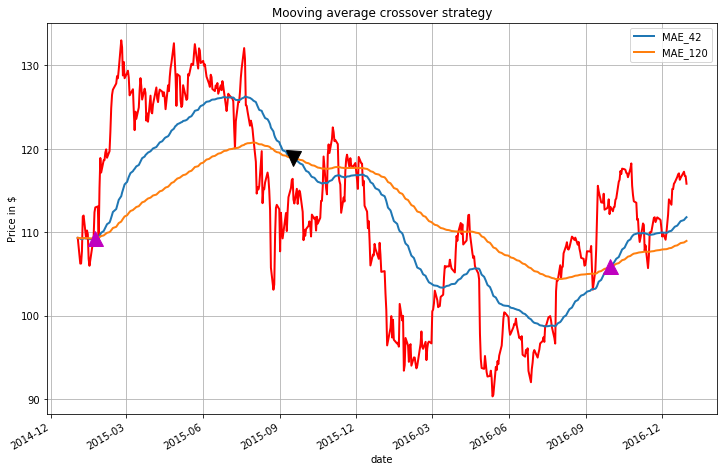

In [33]:
# Plotting all the signals

#Initialize the plot figure
fig=plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $', title="Mooving average crossover strategy")


MSFT['close'].plot(ax =ax1, color='r', lw=2.0, figsize=(12, 8))
MSFT[['MAE_42','MAE_120']].plot(ax =ax1, lw=2.0)


# Plotting buy signal
ax1.plot(MSFT.loc[MSFT.position==1.].index, MSFT.MAE_42[MSFT.position == 1.0], 
        '^', markersize=15, color='m')

# Plotting sell signal
ax1.plot(MSFT.loc[MSFT.position==-1.].index, MSFT.MAE_120[MSFT.position == -1.0], 
        'v', markersize=15, color='k')

#Display the graph
plt.grid(True)
plt.axis('tight')
plt.show()

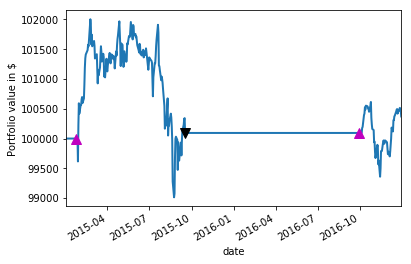

In [34]:
#Backtesting the strategy

#Portfolio variables
initial_capital = 100000.0
nbr_shares_to_buy = 100

# Initializing the portfolio with total holdings of shares
MSFT['holdings']= (nbr_shares_to_buy*MSFT['signal']).multiply(MSFT['close'], axis=0)

#Store the difference in shares owned
MSFT['pos_diff'] = nbr_shares_to_buy*MSFT['position']

# Add cash component
MSFT['cash'] = initial_capital - (MSFT['pos_diff'].multiply(MSFT['close'], axis=0)).cumsum()


# Add total to portfolio
MSFT['total'] = MSFT['cash'] + MSFT['holdings']

# Add returns to portfolio
MSFT['returns'] = MSFT['total'].pct_change()

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
MSFT['total'].plot(ax=ax1, lw=2.)

ax1.plot(MSFT.loc[MSFT.position == 1.0].index, 
         MSFT.total[MSFT.position == 1.0],
         '^', markersize=10, color='m')
ax1.plot(MSFT.loc[MSFT.position == -1.0].index, 
         MSFT.total[MSFT.position == -1.0],
         'v', markersize=10, color='k')

plt.show()
